## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from math import radians, cos, sin, asin, sqrt

# Exploration

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
data['id'].nunique()

21420

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Cleaning

### Address Obvious Outliers

In [6]:
data[data['bedrooms']>30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


33 bedrooms in a 1620 sqft house seems like it was likely a typo. I'll impute 3 as the number of rooms.  

In [7]:
data.loc[data['bedrooms']>30, 'bedrooms']=3

### Null Values

In [8]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
display(data['waterfront'].value_counts(dropna=False))
display(data['view'].value_counts(dropna=False))

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

For these particular variables, which are skewed so heavily toward zero, I will simply impute 0.

In [10]:
data.loc[data['waterfront'].isna(), 'waterfront']=0
data.loc[data['view'].isna(), 'view']=0

In order to use the yr_renovated column, I will need to convert it to a datetime. Considering that so many null values exist in the set, I will need to be creative. I'll create a column called 'yrs since renovation' by combining the date built or renovated with the date sold. For this reason, I can then impute the value of the date built to replace null values for yr_renovated, then convert it to datetime, and use that information to create new features that correctly reflect the information I'm looking for. 

In [11]:
data['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [12]:
data.loc[data['yr_renovated'].isna(), 'yr_renovated']=0
data.loc[
    data['yr_renovated']==0,'yr_renovated']=data.loc[
    data['yr_renovated']==0]['yr_built']

### Convert datatypes

In [13]:
#Trying to convert sqft_basement to float called an error.
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
3500.0        1
207.0         1
1880.0        1
3260.0        1
1135.0        1
Name: sqft_basement, Length: 304, dtype: int64

The ? in the sqft_basement column won't work. I'll use the other data I have to deduce the values for this column. 

In [14]:
data['sqft_basement']=(data['sqft_living']-data['sqft_above'])
data['sqft_basement'].describe()

count    21597.000000
mean       291.725008
std        442.667800
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Zipcode is not a continuous variable. We will need to use one-hot encoding to make it into a useable categorical variable.

In [15]:
data['zipcode'].nunique()

70

In [16]:
data['zipcode'].astype('category', copy=False)
zipdummies = pd.get_dummies(data['zipcode'])
data = data.join(zipdummies, how='outer')

In [17]:
data.loc[data['waterfront']==1, 'waterfront'] = 'WaterFront'
data.loc[data['waterfront']==0, 'waterfront'] = 'Not'

data['waterfront'].astype('category', copy=False)
wfdummies = pd.get_dummies(data['waterfront'])
data = data.join(wfdummies, how='outer')

#Drop columns to avoid the dummy-trap.
data.drop(['Not', 'zipcode'], axis=1, 
          inplace=True)

### Duplicates

In [18]:
data.duplicated().sum()

0

# Feature Creation

I want to be able to use age to describe the houses, so I'll create a feature that stores their age at sale. 

### Month  and Year Sold

In [19]:
data['date']=pd.to_datetime(data['date'])

data['month_sold'] = np.array([date[5:7] 
                               for date 
                               in data['date'].astype(str)])
data['month_sold'] = data['month_sold'].astype('int64')

data['year_sold'] = np.array([date[:4] 
                               for date 
                               in data['date'].astype(str)])
data['year_sold'] = data['year_sold'].astype('int64')
data.drop('date', axis=1, inplace=True)

In [20]:
m_list = ['Jan','Feb','Mar','Apr','May','Jun',
              'Jul','Aug','Sep','Oct','Nov','Dec']
for num in range(1,13):
    data.loc[data['month_sold']==num, 'month_sold'] = m_list[num-1]

data['month_sold'].astype('category', copy=False)
mondummies = pd.get_dummies(data['month_sold'])
data = data.join(mondummies, how='outer')

### Age

In [21]:
data['age'] = data['year_sold']-data['yr_built']

### Years Since Renovation

In [22]:
data['yrs_reno'] = data['year_sold']- data['yr_renovated']
data['yrs_reno'].describe()

count    21597.000000
mean        41.377830
std         28.950873
min         -1.000000
25%         16.000000
50%         37.000000
75%         61.000000
max        115.000000
Name: yrs_reno, dtype: float64

### Renovated?
I'll also add a categorical variable that can be used to determine if renovation itself is a meaningful indicator of value. 

In [23]:
data.loc[data['yrs_reno']-data['age']>0, 
         'Renovated?']='Renovated'
data.loc[data['yrs_reno']-data['age']==0, 
         'Renovated?']='Not'
data['Renovated?'].value_counts(dropna=False)

Not    20853
NaN      744
Name: Renovated?, dtype: int64

In [24]:
data['Renovated?'].astype('category', copy=False)
rendummies = pd.get_dummies(data['Renovated?'])
data = data.join(rendummies, how='outer')
data.drop(['Not'], axis=1, inplace=True)

### City Data
A more decipherable way to utilize the latitude and longitude data is to calculate the distance between each house and the major cities in King County. I can use that information to estimate what city that house resides in, providing another means for analysis. 

I'll use the haversine formula to calculate the miles of distance from the center of particular cities to each house. I'll then use that formula to create columns for the distance to each city and additional columns for the categorical information of what city each house resides in. For this analysis I'll use the largest 6 cities by population in the King County area, including Tacoma, which is technically in Pierce county. 

In [25]:
def haversine(city):
    """
    Return distance in miles between house and city.
    
    Parameters
    city-- tuple, coordinates(lon,lat) for a city
    
    """
    dists = []
    for i in range(0,len(data['long'])):
        lon1, lat1, lon2, lat2 = map(radians, 
                                     [data['long'][i],
                                      data['lat'][i],
                                      city[0], city[1]])
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = (sin(dlat/2)**2 + cos(lat1) 
             * cos(lat2) * sin(dlon/2)**2)
        c = 2 * asin(sqrt(a)) 
        r = 3956 # Radius of earth in miles. 
        dists.append(round(c*r,2))
    return np.array(dists)       

In [26]:
Seattle = (-122.335167, 47.608013, 'Seattle')
Bellevue = (-122.1994444, 47.6105556, 'Bellevue')
Renton = (-122.2158333, 47.4830556, 'Renton') 
Kent = (-122.2336111, 47.3811111, 'Kent')
Federal_Way = (-122.3113889, 47.3225, 'Federal Way')
Tacoma = (-122.4430556, 47.2530556, 'Tacoma')

city_list = [Seattle, Bellevue, Renton, 
             Kent, Federal_Way, Tacoma]

for city in city_list:
    data['dist_to_{}'.format(city[2])] = haversine(city)

In [27]:
city_dist_cols = [('dist_to_{}'.format(city[2]), city[2]) 
                  for city in city_list]
nearest_cities = []

for i in range(0,len(data['long'])):
    dists = []
    for city_dist in city_dist_cols:
        dists.append(((data[city_dist[0]][i]), city_dist[1]))
    nearest_cities.append(sorted(dists)[0][1])
    
data['nearest_city'] = nearest_cities

In [28]:
data[['dist_to_Seattle', 'dist_to_Bellevue',
     'dist_to_Renton', 'dist_to_Kent',
     'dist_to_Federal Way', 'dist_to_Tacoma',
     'nearest_city']]

,dist_to_Seattle,dist_to_Bellevue,dist_to_Renton,dist_to_Kent,dist_to_Federal Way,dist_to_Tacoma,nearest_city
0,7.61,7.37,2.73,9.05,13.27,19.83,Renton
1,7.84,9.44,17.12,23.80,27.52,32.82,Seattle
2,10.15,8.93,17.61,24.63,28.91,34.88,Bellevue
3,6.60,10.94,8.67,12.18,14.21,18.63,Seattle
4,13.52,7.20,12.19,18.50,23.82,31.25,Bellevue
...,...,...,...,...,...,...,...
21592,6.32,9.17,16.11,22.59,26.07,31.14,Seattle
21593,6.83,10.24,7.08,10.77,13.21,18.19,Seattle
21594,1.93,4.77,8.61,15.04,18.78,24.51,Seattle
21595,13.40,8.03,7.71,13.09,18.51,26.14,Renton


In [29]:
data['nearest_city'].value_counts()

Seattle        7210
Bellevue       6482
Renton         3582
Kent           2747
Federal Way    1562
Tacoma           14
Name: nearest_city, dtype: int64

In [30]:
data['nearest_city'].astype('category', copy=False)
ncdummies = pd.get_dummies(data['nearest_city'])
data = data.join(ncdummies, how='outer')

### Size Relative to Neighbors

I'd like to test the old real estate addage that the biggest house on the block has lower than expected value by creating an additional feature that tracks the size of a home compared with its nearst 15 neighbors.

In [31]:
data['rel_size_living'] = (data['sqft_living']
                           /data['sqft_living15'])
data['rel_size_lot'] = data['sqft_lot']/data['sqft_lot15']

In [32]:
data.head()[['sqft_living', 'sqft_living15', 
             'rel_size_living',
             'sqft_lot', 'sqft_lot15', 
             'rel_size_lot']]

,sqft_living,sqft_living15,rel_size_living,sqft_lot,sqft_lot15,rel_size_lot
0,1180,1340,0.880597,5650,5650,1.000000
1,2570,1690,1.520710,7242,7639,0.948030
2,770,2720,0.283088,10000,8062,1.240387
3,1960,1360,1.441176,5000,5000,1.000000
4,1680,1800,0.933333,8080,7503,1.076903


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 122 entries, id to rel_size_lot
dtypes: float64(16), int64(13), object(4), uint8(89)
memory usage: 7.3+ MB


# Build a Baseline Model
In order to fit a baseline model for use in comparisons with the more complete model I will conduct these steps:
1. Handle Muliticolinearity
2. Standardize Variables
3. Fit and Validate the Baseline Model

## 1. Handle Multicolinearity 

In [34]:
high_corr = ((abs(data.corr())> .8).sum()>1)
pd.set_option('display.max_rows', 200)
high_corr

id                     False
price                  False
bedrooms               False
bathrooms              False
sqft_living             True
sqft_lot               False
floors                 False
view                   False
condition              False
grade                  False
sqft_above              True
sqft_basement          False
yr_built                True
yr_renovated            True
lat                     True
long                   False
sqft_living15          False
sqft_lot15             False
98001                  False
98002                  False
98003                  False
98004                  False
98005                  False
98006                  False
98007                  False
98008                  False
98010                  False
98011                  False
98014                  False
98019                  False
98022                  False
98023                  False
98024                  False
98027                  False
98028         

In [35]:
data[['sqft_living', 'sqft_above', 'lat', 'dist_to_Seattle',
      'dist_to_Bellevue', 'dist_to_Kent', 
      'dist_to_Federal Way', 'dist_to_Tacoma']].corr()

,sqft_living,sqft_above,lat,dist_to_Seattle,dist_to_Bellevue,dist_to_Kent,dist_to_Federal Way,dist_to_Tacoma
sqft_living,1.000000,0.876448,0.052155,0.075782,-0.108852,0.060714,0.096550,0.126927
sqft_above,0.876448,1.000000,-0.001199,0.191956,-0.024551,0.041983,0.082470,0.123426
lat,0.052155,-0.001199,1.000000,-0.602416,-0.679264,0.871301,0.904534,0.879188
dist_to_Seattle,0.075782,0.191956,-0.602416,1.000000,0.838315,-0.251338,-0.288925,-0.235535
dist_to_Bellevue,-0.108852,-0.024551,-0.679264,0.838315,1.000000,-0.322515,-0.445119,-0.456513
dist_to_Kent,0.060714,0.041983,0.871301,-0.251338,-0.322515,1.000000,0.965758,0.922683
dist_to_Federal Way,0.096550,0.082470,0.904534,-0.288925,-0.445119,0.965758,1.000000,0.987446
dist_to_Tacoma,0.126927,0.123426,0.879188,-0.235535,-0.456513,0.922683,0.987446,1.000000


To avoid multicolinearity issues I will drop sqft_above, because the information already exists in a combination of sqft_living and sqft_basement, so it's exclusion will not hinder the model. In addition, the categorical variables for nearest city will serve my purposes sufficiently and distance variables to each city aside from Seattle will be dropped. 

In [36]:
data.drop(['sqft_above', 'dist_to_Bellevue', 'dist_to_Kent', 
           'dist_to_Federal Way', 'dist_to_Tacoma'], axis=1,
          inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 117 entries, id to rel_size_lot
dtypes: float64(12), int64(12), object(4), uint8(89)
memory usage: 6.4+ MB


## 2. Standardize Variables 
To standardize the data I'll be using scikit learn's Robust Scalar function because of the existence of significant outliers in the independent variable, price.

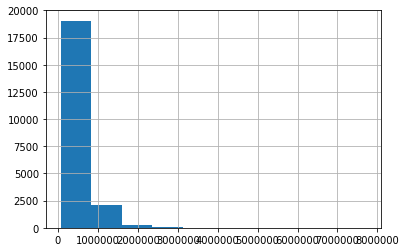

In [38]:
data['price'].hist();
data.drop('id', axis=1, inplace=True)

In [39]:
#Separate data into categorical and continuous groups. 
cat_data = data.select_dtypes(include='uint8')

con_data = (data.select_dtypes(exclude='uint8')
#Keep certain categorical data separate to use for visuals.
            .drop(['Renovated?', 'month_sold', 'nearest_city', 
                  'waterfront'], axis=1))
groups = data[['Renovated?', 'month_sold', 'nearest_city',
               'waterfront']]
con_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,...,long,sqft_living15,sqft_lot15,year_sold,age,yrs_reno,dist_to_Seattle,dist_to_Renton,rel_size_living,rel_size_lot
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0,...,-122.257,1340,5650,2014,59,59.0,7.61,2.73,0.880597,1.000000
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400,...,-122.319,1690,7639,2014,63,23.0,7.84,17.12,1.520710,0.948030
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0,...,-122.233,2720,8062,2015,82,82.0,10.15,17.61,0.283088,1.240387
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910,...,-122.393,1360,5000,2014,49,49.0,6.60,8.67,1.441176,1.000000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0,...,-122.045,1800,7503,2015,28,28.0,13.52,12.19,0.933333,1.076903


In [40]:
def scale(col):
    return (con_data[col]
            -con_data[col].mean())/con_data[col].std()

In [41]:
scaled_con_data = pd.DataFrame([])
for col in con_data.columns:
    scaled_con_data[col] = scale(col) 
scaled_con_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,...,long,sqft_living15,sqft_lot15,year_sold,age,yrs_reno,dist_to_Seattle,dist_to_Renton,rel_size_living,rel_size_lot
count,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,...,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,-5.372992e-17,3.508381e-16,-2.207430e-15,-1.857928e-16,2.098202e-16,-1.925871e-14,-1.646217e-15,2.583457e-15,1.586436e-14,-6.619092e-15,...,-4.654050e-12,-1.936580e-16,-1.840605e-16,1.187230e-13,-6.064613e-16,-6.553282e-17,-8.318412e-15,8.570293e-15,-6.459943e-15,2.863982e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.258401e+00,-2.623405e+00,-2.101247e+00,-1.862880e+00,-3.520522e-01,-9.155311e-01,-3.049417e-01,-3.704314e+00,-3.970267e+00,-6.590156e-01,...,-2.167495e+00,-2.316914e+00,-4.439058e-01,-6.906510e-01,-1.508760e+00,-1.463784e+00,-1.614257e+00,-2.244317e+00,-2.703197e+00,-8.422606e-01
25%,-5.942175e-01,-4.112514e-01,-4.757266e-01,-7.083297e-01,-2.429067e-01,-9.155311e-01,-3.049417e-01,-6.299719e-01,-5.607873e-01,-6.590156e-01,...,-8.102234e-01,-7.247493e-01,-2.807861e-01,-6.906510e-01,-8.620023e-01,-8.765826e-01,-8.204474e-01,-7.677515e-01,-5.368399e-01,-1.533866e-01
50%,-2.457932e-01,-4.112514e-01,1.744818e-01,-1.855143e-01,-1.806552e-01,1.093901e-02,-3.049417e-01,-6.299719e-01,-5.607873e-01,-6.590156e-01,...,-1.209286e-01,-2.139723e-01,-1.883919e-01,-6.906510e-01,-1.131243e-01,-1.512158e-01,-1.811983e-01,1.316157e-02,-1.659137e-01,-1.042341e-01
75%,2.850095e-01,6.948254e-01,4.995859e-01,5.115728e-01,-1.065957e-01,9.374092e-01,-3.049417e-01,9.071993e-01,2.915825e-01,6.060414e-01,...,6.323214e-01,5.448965e-01,-9.808756e-02,1.447842e+00,6.697935e-01,6.777747e-01,6.411222e-01,7.475686e-01,3.368438e-01,-3.129271e-02
max,1.948918e+01,8.437363e+00,7.651878e+00,1.248187e+01,3.951112e+01,3.716820e+00,4.926055e+00,2.444371e+00,4.553432e+00,1.022951e+01,...,6.388288e+00,6.163444e+00,3.147422e+01,1.447842e+00,2.439869e+00,2.543003e+00,5.471505e+00,6.429050e+00,1.544390e+01,6.746980e+01


In [42]:
model_data = scaled_con_data.join(cat_data, how='outer')
model_data.head()

#Save complete dataset for visualising later.
data_fin = model_data.join(groups, how='outer')

# Build a Baseline Model

In [43]:
#Drop dependent variables
X = model_data.drop('price', axis=1)
y = model_data['price']
y.describe()

count    2.159700e+04
mean    -5.372992e-17
std      1.000000e+00
min     -1.258401e+00
25%     -5.942175e-01
50%     -2.457932e-01
75%      2.850095e-01
max      1.948918e+01
Name: price, dtype: float64

In [44]:
(X_train,X_test,
 y_train,y_test)=train_test_split(X,y,test_size=.2,
                                  random_state=37)

To begin I'll fit a model with all the data in order to establish a baseline for future models.

In [45]:
linreg = LinearRegression()
model1 = linreg.fit(X_train,y_train)
crossval = KFold(n_splits=10, shuffle=True)

In [46]:
type(model1.coef_)

numpy.ndarray

In [47]:
def report(model):
    """
    Return relevant statistics for a model
    
    Parameters:
    model: Fitted LinearRegression object
    """
    pred_y_train = model.predict(X_train)
    pred_y_test = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, pred_y_train)
    test_mse = mean_squared_error(y_test, pred_y_test)
    
    coefs = []
    high_coefs = []
    
    for i in range(0, len(model.coef_)):
        coefs.append((model.coef_[i],X.columns[i]))
    
    for coef in coefs:
        if abs(coef[0]) > abs(np.quantile(model.coef_, .05)):
            high_coefs.append(coef)
    
    print('High Impact Variables:\n')
    
    for variable in high_coefs:
        print('Variable: {}\nCoefficient: {}\n'
              .format(variable[1],variable[0]))

    print('\nTrain MSE: {}\nTest MSE: {}\nDifference:{}\n'
          .format((train_mse),(test_mse),
                  (train_mse-test_mse)))
    print('Test R^2: {}\n'
          .format((r2_score(y_test,pred_y_test))))
    print('CrossVal R^2: {}'
          .format(np.mean(cross_val_score(model,X_train,
                                          y_train,
                                          scoring='r2',
                                          cv=crossval))))
    plotdf = pd.DataFrame([])
    plotdf['test_resids'] = pred_y_test-y_test
    plotdf['y_test'] = y_test
    sns.jointplot(x = 'y_test', y = 'test_resids',
                  data=plotdf)

High Impact Variables:

Variable: yr_built
Coefficient: -613840620573.1442

Variable: yr_renovated
Coefficient: -260604560832.80823

Variable: age
Coefficient: -613883470693.3959

Variable: yrs_reno
Coefficient: -260653892735.51376

Variable: Feb
Coefficient: -21597495985.422497

Variable: Jan
Coefficient: -21597495985.4346

Variable: Bellevue
Coefficient: 53024353568.701485

Variable: Federal Way
Coefficient: 53024353568.744156

Variable: Kent
Coefficient: 53024353568.74689

Variable: Renton
Coefficient: 53024353568.67581

Variable: Seattle
Coefficient: 53024353568.69329

Variable: Tacoma
Coefficient: 53024353568.771355


Train MSE: 0.18008630542291482
Test MSE: 0.18423922266260462
Difference:-0.004152917239689802

Test R^2: 0.8243475249458074

CrossVal R^2: 0.8136314577197504


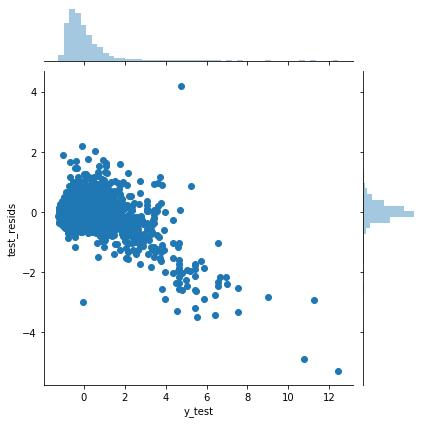

In [48]:
report(model1)

Based on the MSE and R-squared, the model seems fairly accurate. However, based on the scatterplot of residuals, it is clear that the model is not generalizable, especially for high value homes.

# Train the Model
In order to train the model and verify it's validity I will conduct the following steps:

1. Find and include interactions.
2. Find and include polynomial features.
3. Satisfy Assumptions.
4. Validate Model

During this process I will continually test the models and eliminate variables that do not serve the model.

## Find and Include Interactions

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 12153 to 1935
Columns: 111 entries, bedrooms to Tacoma
dtypes: float64(22), uint8(89)
memory usage: 5.1 MB


In [59]:
con_data_train = (X_train.select_dtypes(exclude='uint8'))
con_data_train['bedrooms']*con_data_train['bathrooms']

12153    2.201703
7456    -0.205455
1175     0.721833
4737    -0.071756
10775    7.223511
           ...   
4118     2.201703
988     -0.071756
9036     0.121234
20843   -0.071756
1935    -0.205455
Length: 17277, dtype: float64

In [65]:
combos = list(combinations(con_data_train.columns, 2))
type(combos[0][0])

str

In [68]:
con_data_train.loc[:,'bedrooms']

12153   -1.517328
7456    -0.411251
1175    -1.517328
4737    -0.411251
10775    4.013056
           ...   
4118    -1.517328
988     -0.411251
9036     0.694825
20843   -0.411251
1935    -0.411251
Name: bedrooms, Length: 17277, dtype: float64

In [73]:
con_data_train = (X_train.select_dtypes(exclude='uint8'))
combos = list(combinations(con_data_train.columns, 2))
inters = [(1,0,0)]*10
temp_X = X_train.loc[:]
for combo in combos:
    temp_X['interaction'] = (con_data_train.loc[:, combo[0]]
                             *con_data_train.loc[:, combo[1]])
    linreg = LinearRegression()
    model = linreg.fit(temp_X, y_train)
    y_pred = model.predict(temp_X)
    score = mean_squared_error(y_train, y_pred)
    if score < inters[-1][0]:
        inters.append((score, combo[0], combo[1]))
        inters = sorted(inters)[:10]
print(inters) 

[(0.15014319836614934, 'sqft_living', 'dist_to_Seattle'), (0.15283966417292377, 'sqft_living', 'grade'), (0.16013813864746798, 'grade', 'dist_to_Seattle'), (0.16075188748248836, 'bathrooms', 'sqft_living'), (0.161669769271221, 'bathrooms', 'grade'), (0.16192026718275707, 'sqft_living15', 'dist_to_Seattle'), (0.16781791268477894, 'bathrooms', 'dist_to_Seattle'), (0.1678637757884959, 'sqft_living', 'sqft_basement'), (0.16794186921068074, 'sqft_living', 'interaction'), (0.16805932864925482, 'grade', 'sqft_basement')]


In [ ]:
def find_inters(n, model):
    """
    Returns n most predictive interactions based on MSE.
    
    Parameters:
    n: int. the number of interactions selected.
    X: pandas dataframe. independent variables being selected
    from
    """
    con_data_train = (X_train.select_dtypes(exclude='uint8'))
    combos = list(combinations(con_data_train.columns, 2))
    inters = [(1,0,0)]*n
    temp_X = X_train
    for combo in combos:
        temp_X['interaction']=(con_data_train[combo[0]]
                              *con_data_train[combo[1]])
        linreg = LinearRegression()
        model = linreg.fit(temp_X, y_train)
        y_pred = model.predict(temp_X)
        score = mean_squared_error(y_train, y_pred)
        if score < inters[-1][0]:
            inters.append((score, combo[0], combo[1]))
            inters = sorted(inters)[:n]
    return inters

In [ ]:
print(find_inters(10,model1))

In [ ]:
def optimize_variables(X,y):
    """
    Forward selects variables by adjusted R^2.
    
    Parameters:
    X: pandas dataframe. independent variables.
    y: pandas series. dependent variable.
    
    Returns:
    Optimized model. 
    """
current_score, best_score = 0, 0
remaining = set(X.columns)
selected = pd.DataFrame()
while remaining and not current_score > best_score:
    scores_with_candidates = []
    for candidate in remaining:
        test_x = selected.join(X[str(candidate)], how='outer')
        score = sm.OLS(y,test_x).fit().rsquared_adj
        scores_with_candidates.append((score,candidate))
    scores_with_candidates.sort()
    best_score, best_candidate = scores_with_candidates.pop()
    if current_score < best_score:
        remaining.remove(best_candidate)
        selected = selected.join(X[str(best_candidate)], how='outer')
        current_score = best_score
print('Selected Columns: {}'.format(selected.columns))
best_vars = sm.add_constant(selected)
return sm.OLS(y, best_vars).fit()

In [ ]:
def isolate(col):
    ind_var = pd.DataFrame(X[col]) 
    frozen_var = X.drop(col, axis=1)
    for fro_col in frozen_var.columns:
        frozen_var[fro_col] = frozen_var[fro_col].mean()
    iso_X = ind_var.join(frozen_var, how='outer')
    return iso_X